# Data Processing
1- Removing Duplicate data
2- Handling Missing values
3- Removing Irrelevant columns like Customer_Id

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv(r"D:\projects\dispute\Final_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259923 entries, 0 to 259922
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Unnamed: 0                    259923 non-null  int64 
 1   Date received                 259923 non-null  object
 2   Product                       259923 non-null  object
 3   Sub-product                   184638 non-null  object
 4   Issue                         259923 non-null  object
 5   Sub-issue                     101080 non-null  object
 6   Consumer complaint narrative  40598 non-null   object
 7   Company public response       49528 non-null   object
 8   Company                       259923 non-null  object
 9   State                         257842 non-null  object
 10  ZIP code                      257835 non-null  object
 11  Tags                          36260 non-null   object
 12  Consumer consent provided?    73732 non-null   object
 13 

In [4]:
df.head()

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,...,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Age,Gender
0,0,14-10-2015,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,...,NaN,Consent not provided,Web,14-10-2015,Closed with explanation,Yes,No,1605653,56,Male
1,1,26-04-2015,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,...,NaN,Consent provided,Web,26-04-2015,Closed with explanation,Yes,Yes,1347613,69,Female
2,2,20-12-2013,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,...,NaN,NaN,Phone,03-01-2014,Closed with non-monetary relief,Yes,No,640394,46,Male
3,3,03-03-2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,...,NaN,NaN,Referral,04-03-2016,Closed with explanation,Yes,No,1815134,32,Female
4,4,30-01-2015,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,...,NaN,NaN,Web,30-01-2015,Closed with explanation,Yes,Yes,1218613,60,Female


In [5]:
df.shape

(259923, 21)

In [6]:
df['Tags'].value_counts()

Tags
Older American                   21141
Servicemember                    12194
Older American, Servicemember     2925
Name: count, dtype: int64

In [7]:
df["Consumer complaint narrative"].value_counts()

Consumer complaint narrative
This company continues to report on my credit report after I sent them a letter telling them that this account was not mine and I have no idea what it is or who it belongs to! \r\n\r\nI asked for proof of a signed contract, I asked for a license to collect in my state, I asked for copies of all information referenced for this debt and still to date, I have not received anything but harassment from this company! \r\n\r\nTHIS IS NOT MY DEBT! \r\n\r\nI WANT THIS ACCOUNT REMOVED FROM MY CREDIT REPORT AND THIS COMPANY TO STOP CONTACTING ME IMMEDIATELY! \r\n                                                                                                                                                                                                                                                                                                                                                                                                                             

In [8]:
df["Age"].value_counts()

Age
55    5057
40    5050
65    5017
33    5014
53    5002
62    4987
34    4983
45    4979
61    4974
39    4966
22    4965
32    4965
35    4957
43    4957
19    4956
38    4953
68    4953
30    4949
49    4944
50    4943
27    4938
47    4925
57    4923
54    4917
31    4904
36    4903
28    4902
44    4900
56    4896
26    4889
21    4884
46    4884
18    4880
58    4877
51    4873
67    4869
24    4867
29    4862
59    4861
63    4859
20    4855
70    4854
37    4852
66    4838
25    4836
64    4835
69    4813
41    4811
48    4803
42    4795
60    4768
52    4743
23    4736
Name: count, dtype: int64

In [9]:
df["Company"].value_counts()


Company
Bank of America                  25340
Wells Fargo & Company            19132
JPMorgan Chase & Co.             15746
Equifax                          15586
Experian                         14666
                                 ...  
Blackwater Capital Group LLC.        1
Blackwell, Burns & Pratt             1
JDJ Investments, INC.                1
Ross, Stuart & Dawson Inc            1
Sure Recovery Service LLC            1
Name: count, Length: 2827, dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative', 'Company public response',
       'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Age',
       'Gender'],
      dtype='object')

In [11]:
df.isnull().sum()

Unnamed: 0                           0
Date received                        0
Product                              0
Sub-product                      75285
Issue                                0
Sub-issue                       158843
Consumer complaint narrative    219325
Company public response         210395
Company                              0
State                             2081
ZIP code                          2088
Tags                            223663
Consumer consent provided?      186191
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
Age                                  0
Gender                               0
dtype: int64

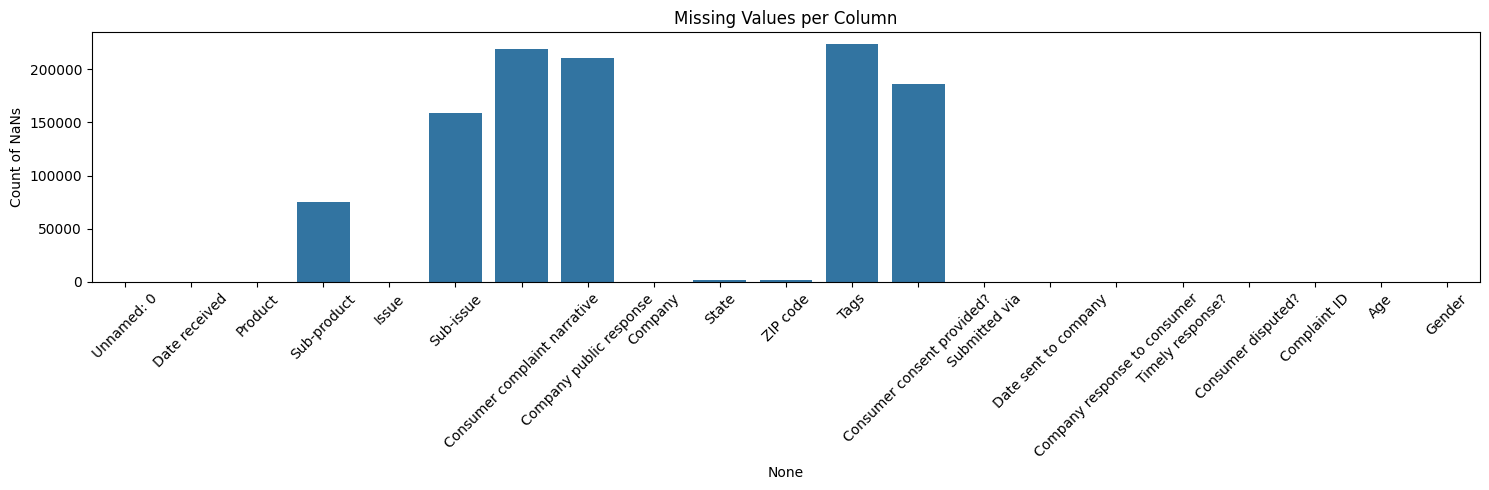

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.xticks(rotation=45)
plt.title("Missing Values per Column")
plt.ylabel("Count of NaNs")
plt.tight_layout()
plt.show()

In [13]:
df.isnull().mean().sort_values(ascending=False)

Tags                            0.860497
Consumer complaint narrative    0.843808
Company public response         0.809451
Consumer consent provided?      0.716331
Sub-issue                       0.611116
Sub-product                     0.289643
ZIP code                        0.008033
State                           0.008006
Date sent to company            0.000000
Age                             0.000000
Complaint ID                    0.000000
Consumer disputed?              0.000000
Timely response?                0.000000
Company response to consumer    0.000000
Unnamed: 0                      0.000000
Submitted via                   0.000000
Date received                   0.000000
Company                         0.000000
Issue                           0.000000
Product                         0.000000
Gender                          0.000000
dtype: float64

drop columns with more ths 50 % missing data

In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique().sort_values(ascending=False)

Unnamed: 0                      259923
Complaint ID                    259923
Consumer complaint narrative     40210
ZIP code                         22199
Company                           2827
Date received                     1758
Date sent to company              1697
Issue                               95
Sub-issue                           67
State                               62
Age                                 53
Sub-product                         47
Product                             12
Company public response             10
Submitted via                        6
Company response to consumer         6
Consumer consent provided?           4
Tags                                 3
Consumer disputed?                   2
Timely response?                     2
Gender                               2
dtype: int64

In [16]:
df.shape

(259923, 21)

In [17]:
df["Consumer disputed?"].value_counts()

Consumer disputed?
No     204754
Yes     55169
Name: count, dtype: int64

In [18]:

disputed_cons = df[df['Consumer disputed?']=='Yes']
disputed_cons.shape

(55169, 21)

# Exploratory Data Analysis(EDA)
1- No of Disputes Product Wise
2- No of Disputes per Issue
3- Top 10 states with Disputes
4- Top 10 Issues
5- Media of Complaint Submission
6- Company Responses to Complaints


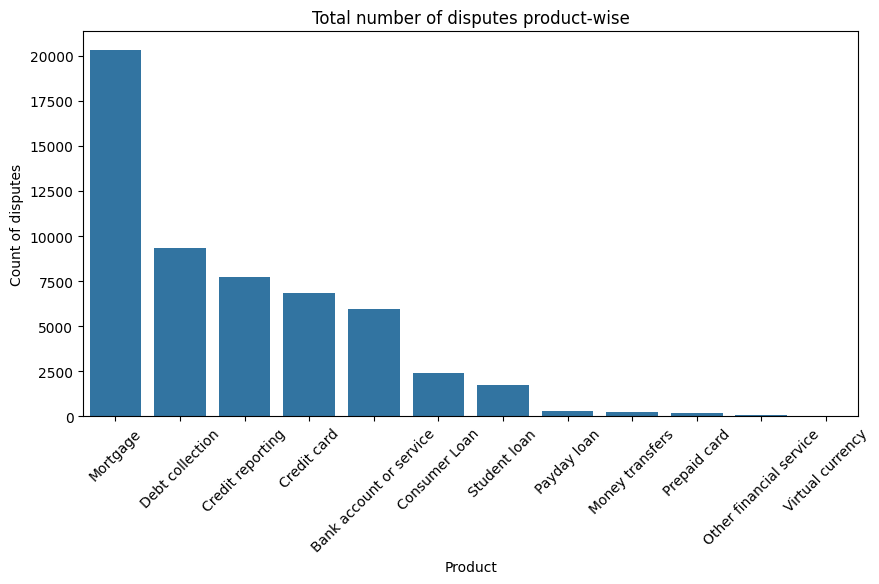

In [19]:

# Create aggregated data for plotting
temp = pd.DataFrame(disputed_cons.groupby('Product')['Consumer disputed?'].count().sort_values(ascending=False))

# Plot the bar graph
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, x=temp.index, y='Consumer disputed?')
plt.title('Total number of disputes product-wise')
plt.ylabel('Count of disputes')
plt.xticks(rotation=45)
plt.show()

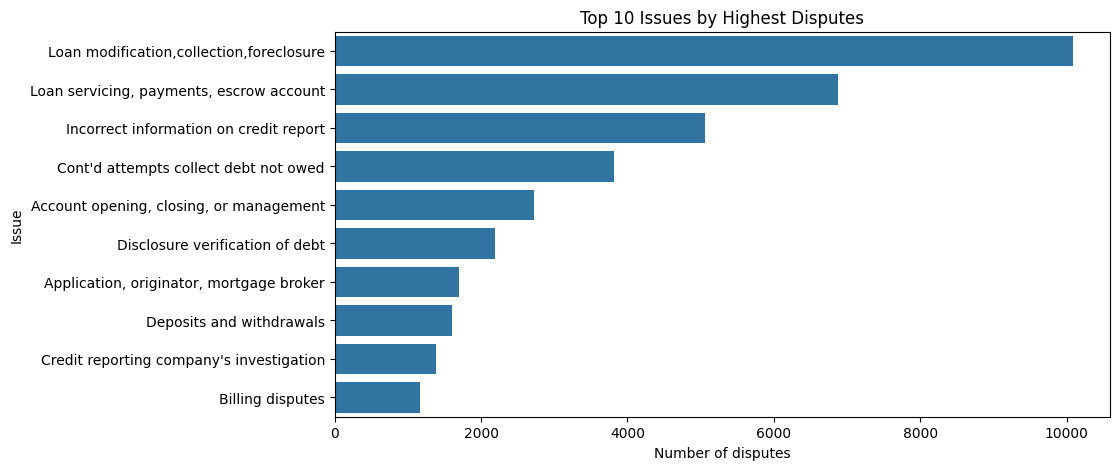

In [20]:

temp = pd.DataFrame(disputed_cons.groupby('Issue')['Consumer disputed?'].count().sort_values(ascending=False).head(10))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, y=temp.index, x='Consumer disputed?')
plt.title('Top 10 Issues by Highest Disputes')
plt.xlabel('Number of disputes')
plt.show()

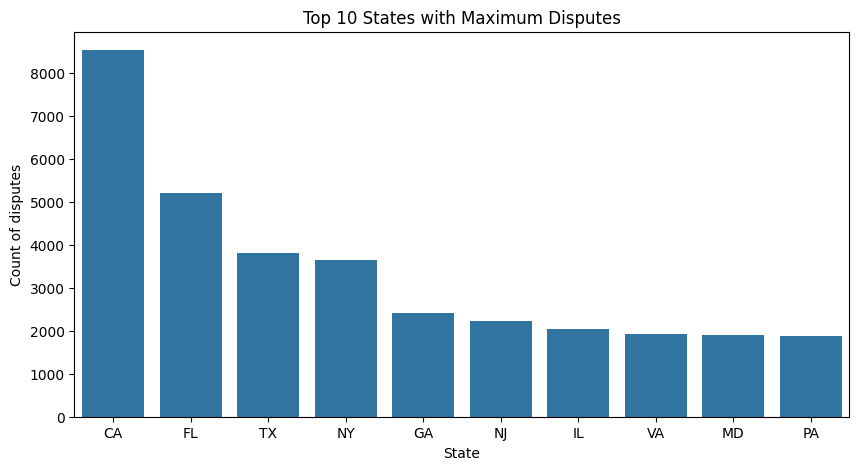

In [21]:
temp = pd.DataFrame(disputed_cons.groupby('State')['Consumer disputed?'].count().sort_values(ascending=False).head(10))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, x=temp.index, y='Consumer disputed?')
plt.title('Top 10 States with Maximum Disputes')
plt.ylabel('Count of disputes')
plt.show()

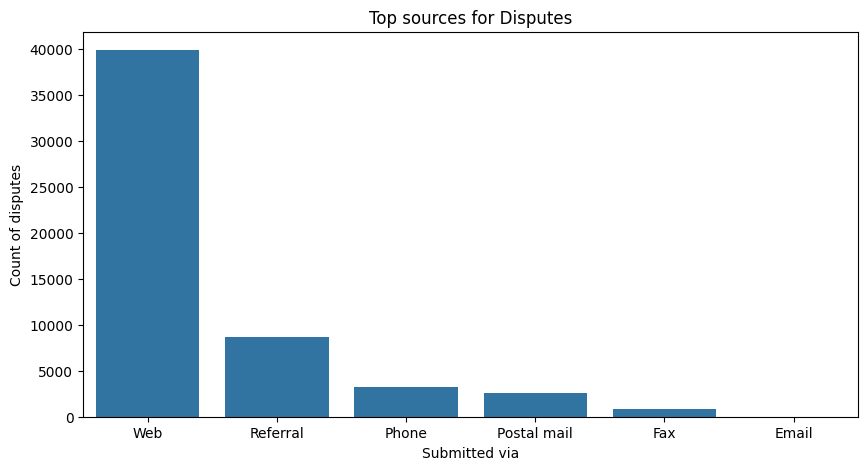

In [22]:
temp = pd.DataFrame(disputed_cons.groupby('Submitted via')['Consumer disputed?'].count().sort_values(ascending=False))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, x=temp.index, y='Consumer disputed?')
plt.title('Top sources for Disputes')
plt.ylabel('Count of disputes')
plt.show()

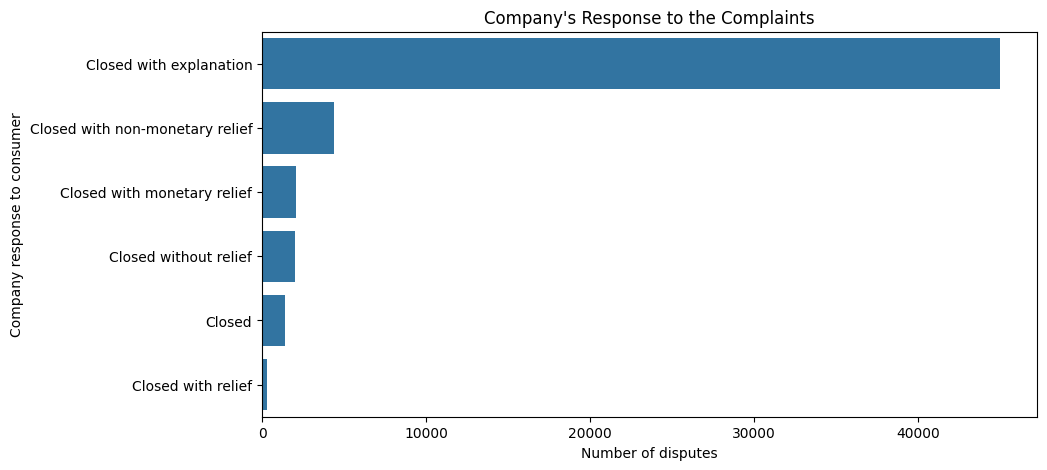

In [23]:
temp = pd.DataFrame(disputed_cons.groupby('Company response to consumer')['Consumer disputed?'].count().sort_values(ascending=False))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, y=temp.index, x='Consumer disputed?')
plt.title("Company's Response to the Complaints")
plt.xlabel('Number of disputes')
plt.show()

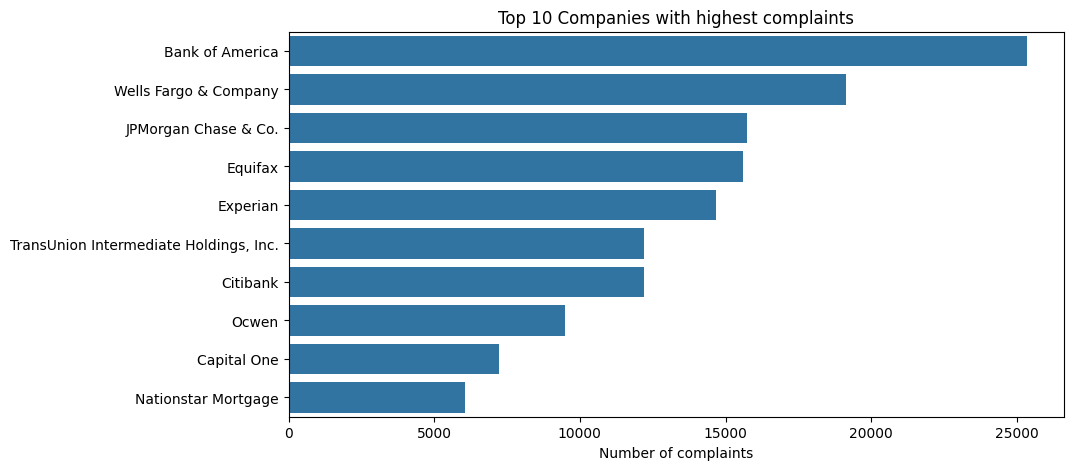

In [24]:

temp = pd.DataFrame(df.groupby(['Company'])['Consumer disputed?'].count().sort_values( ascending=False).head(10))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, y='Company', x='Consumer disputed?' )
plt.title("Top 10 Companies with highest complaints")
plt.xlabel('Number of complaints') 
plt.ylabel('')
plt.show()

In [25]:
a=df["Consumer disputed?"].value_counts()

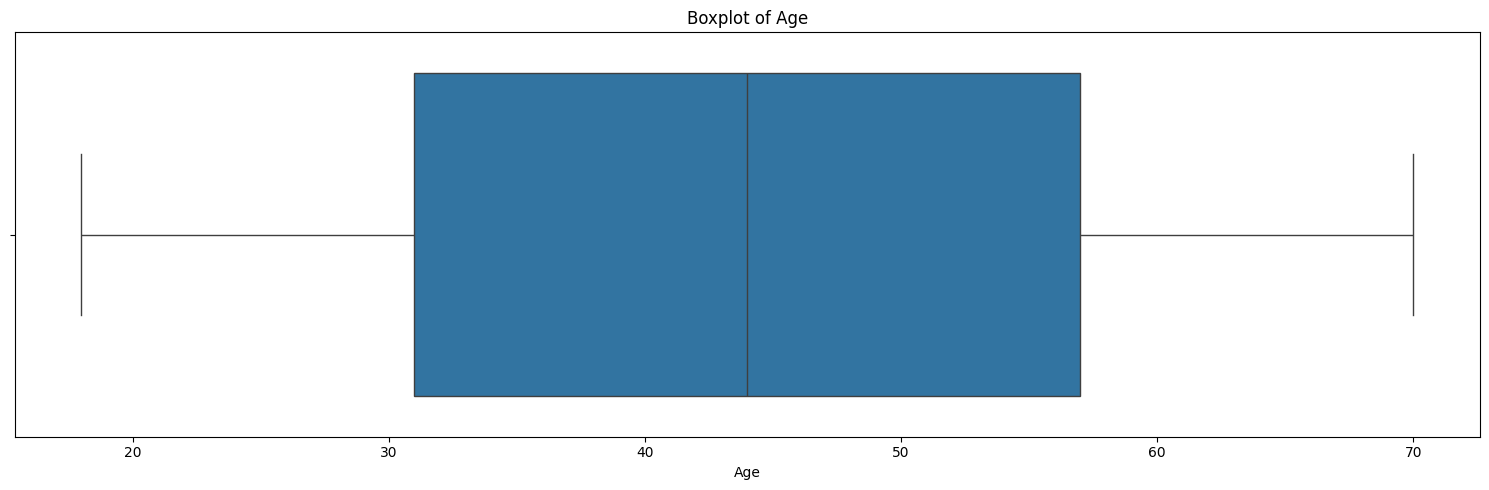

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.boxplot(x=df.Age)

plt.title("Boxplot of Age")

plt.tight_layout()
plt.show()

# Cleaning issue using nlp
Extrating text from issue and then using the relevant text as features via encoding fro training the model


In [27]:

import nltk
import string
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [28]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\AMANPREET
[nltk_data]     KAUR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AMANPREET
[nltk_data]     KAUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AMANPREET
[nltk_data]     KAUR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Lower case and tokenize


In [29]:
df['tokenized'] = df['Issue'].apply(lambda x: wordpunct_tokenize(x.lower()))

### punctuation

In [30]:
import string

def remove_punctuation(tokens):
    return [w for w in tokens if w not in string.punctuation]

df['no_punct'] = df['tokenized'].apply(remove_punctuation)


### stop words

In [31]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['no_stopwords'] = df['no_punct'].apply(lambda tokens: [w for w in tokens if w not in stop_words])


### Lemmatization

In [32]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df['lemmatized'] = df['no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(w, pos='v') for w in tokens])


In [33]:
df['Issue_cleaned'] = df['lemmatized'].apply(lambda tokens: ' '.join(tokens))


In [34]:
df.columns

Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative', 'Company public response',
       'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Age',
       'Gender', 'tokenized', 'no_punct', 'no_stopwords', 'lemmatized',
       'Issue_cleaned'],
      dtype='object')

In [35]:
drop_cols = ['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID',
             'Sub-issue',
             'Sub-product',  'State', 'tokenized', 'no_punct',
             'no_stopwords', 'lemmatized']

df = df.drop(columns=drop_cols)

In [36]:
df['Consumer disputed?'] = df['Consumer disputed?'].map({'Yes': 1, 'No': 0})


one hot encoding


In [37]:
cat_cols = ['Product', 'Submitted via', 'Company response to consumer',
            'Timely response?', 'Tags', 'Consumer consent provided?',
            'Gender']
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features=150) 
X_text = tf.fit_transform(df['Issue_cleaned']).toarray()
tfidf_df = pd.DataFrame(X_text, columns=[f'Feature_{i}' for i in range(X_text.shape[1])])

df = df.drop(columns=['Issue_cleaned'])  # Drop text
df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)


In [39]:
print("Final shape:", df.shape)
print("Null values:\n", df.isnull().sum())
print("Columns:\n", df.columns.tolist())


Final shape: (259923, 192)
Null values:
 Unnamed: 0                           0
Issue                                0
Consumer complaint narrative    219325
Company public response         210395
Company                              0
                                 ...  
Feature_145                          0
Feature_146                          0
Feature_147                          0
Feature_148                          0
Feature_149                          0
Length: 192, dtype: int64
Columns:
 ['Unnamed: 0', 'Issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'Consumer disputed?', 'Age', 'Product_Bank account or service', 'Product_Consumer Loan', 'Product_Credit card', 'Product_Credit reporting', 'Product_Debt collection', 'Product_Money transfers', 'Product_Mortgage', 'Product_Other financial service', 'Product_Payday loan', 'Product_Prepaid card', 'Product_Student loan', 'Product_Virtual currency', 'Submitted via_Email', 'Submitted via_Fax', 'Submitt

In [40]:
df.columns

Index(['Unnamed: 0', 'Issue', 'Consumer complaint narrative',
       'Company public response', 'Company', 'Consumer disputed?', 'Age',
       'Product_Bank account or service', 'Product_Consumer Loan',
       'Product_Credit card',
       ...
       'Feature_140', 'Feature_141', 'Feature_142', 'Feature_143',
       'Feature_144', 'Feature_145', 'Feature_146', 'Feature_147',
       'Feature_148', 'Feature_149'],
      dtype='object', length=192)

In [41]:
df.head()

,Unnamed: 0,Issue,Consumer complaint narrative,Company public response,Company,Consumer disputed?,Age,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,...,Feature_140,Feature_141,Feature_142,Feature_143,Feature_144,Feature_145,Feature_146,Feature_147,Feature_148,Feature_149
0,0,Incorrect information on credit report,NaN,NaN,Equifax,0,56,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,1,Deposits and withdrawals,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,1,69,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
2,2,Other,NaN,NaN,Citibank,0,46,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,3,Disclosure verification of debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",0,32,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0
4,4,Disclosure verification of debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",1,60,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0


In [42]:
df.drop(columns=["Age","Issue",],inplace=True)

In [43]:
df.drop(columns=[	"Unnamed: 0"	,"Consumer complaint narrative"	,"Company public response",],inplace=True)

In [44]:
df.head()

,Company,Consumer disputed?,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Feature_140,Feature_141,Feature_142,Feature_143,Feature_144,Feature_145,Feature_146,Feature_147,Feature_148,Feature_149
0,Equifax,0,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Wells Fargo & Company,1,True,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
2,Citibank,0,False,False,True,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,"FAIR COLLECTIONS & OUTSOURCING, INC.",0,False,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0
4,"HCFS Health Care Financial Services, Inc.",1,False,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0


In [45]:
df['Product_Bank account or service'] = df['Product_Bank account or service'].map({'True': 1, 'False': 0})

In [46]:
bool_cols = df.select_dtypes(include='bool').columns

# Convert all boolean columns to int (0/1)
for col in bool_cols:
    df[col] = df[col].map({True: 1, False: 0})

In [47]:
df.head()

,Company,Consumer disputed?,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Feature_140,Feature_141,Feature_142,Feature_143,Feature_144,Feature_145,Feature_146,Feature_147,Feature_148,Feature_149
0,Equifax,0,NaN,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Wells Fargo & Company,1,NaN,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
2,Citibank,0,NaN,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,"FAIR COLLECTIONS & OUTSOURCING, INC.",0,NaN,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0
4,"HCFS Health Care Financial Services, Inc.",1,NaN,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0


In [48]:
df.isnull().sum()

Company                                 0
Consumer disputed?                      0
Product_Bank account or service    259923
Product_Consumer Loan                   0
Product_Credit card                     0
                                    ...  
Feature_145                             0
Feature_146                             0
Feature_147                             0
Feature_148                             0
Feature_149                             0
Length: 187, dtype: int64

In [49]:
df.head()

,Company,Consumer disputed?,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Feature_140,Feature_141,Feature_142,Feature_143,Feature_144,Feature_145,Feature_146,Feature_147,Feature_148,Feature_149
0,Equifax,0,NaN,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Wells Fargo & Company,1,NaN,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
2,Citibank,0,NaN,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,"FAIR COLLECTIONS & OUTSOURCING, INC.",0,NaN,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0
4,"HCFS Health Care Financial Services, Inc.",1,NaN,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0


In [50]:
df.drop(columns=["Company","Product_Bank account or service"],inplace=True)

In [51]:
df.head()

,Consumer disputed?,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Feature_140,Feature_141,Feature_142,Feature_143,Feature_144,Feature_145,Feature_146,Feature_147,Feature_148,Feature_149
0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0
4,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0


In [52]:
df.columns

Index(['Consumer disputed?', 'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Money transfers', 'Product_Mortgage',
       'Product_Other financial service', 'Product_Payday loan',
       'Product_Prepaid card',
       ...
       'Feature_140', 'Feature_141', 'Feature_142', 'Feature_143',
       'Feature_144', 'Feature_145', 'Feature_146', 'Feature_147',
       'Feature_148', 'Feature_149'],
      dtype='object', length=185)

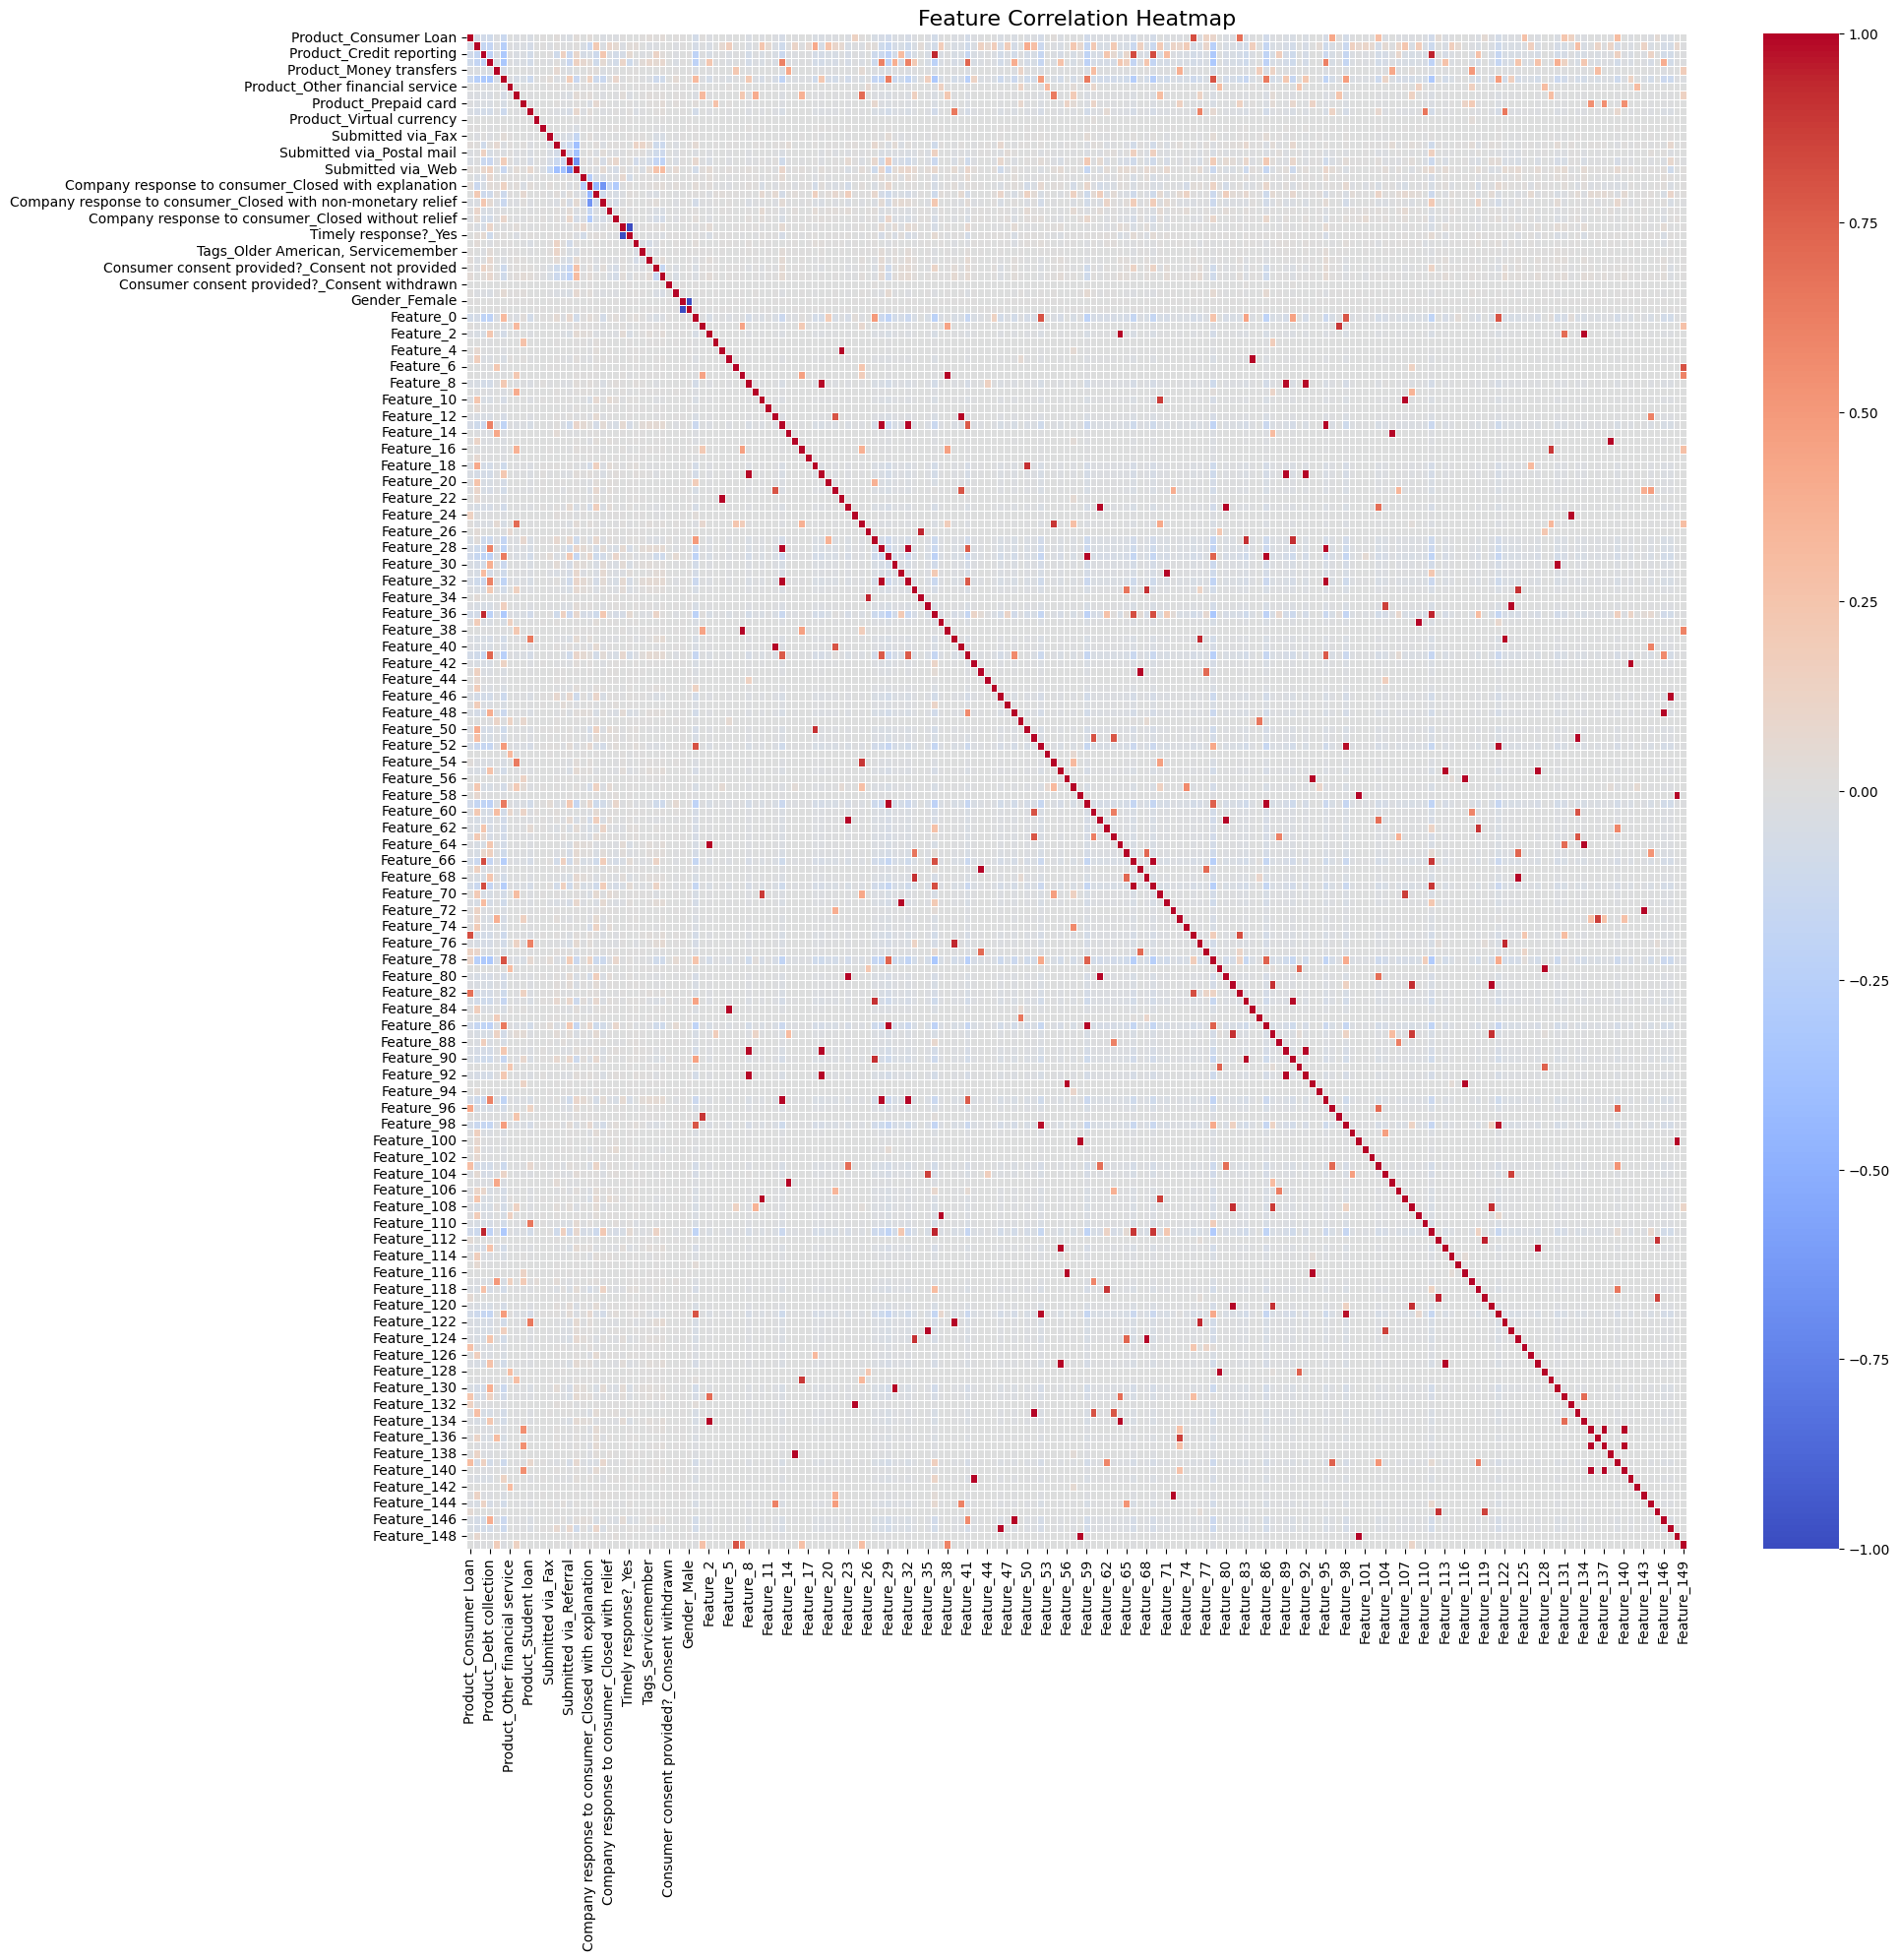

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only use numeric features for correlation (excluding target if present)
numeric_df = df.drop(columns=['Consumer disputed?'])  # Drop target
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


In [54]:
numeric_df 

,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,Product_Student loan,...,Feature_140,Feature_141,Feature_142,Feature_143,Feature_144,Feature_145,Feature_146,Feature_147,Feature_148,Feature_149
0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0
4,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259918,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
259919,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
259920,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
259921,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.629933,0.000000,0.0,0.0


## Model

In [55]:
from sklearn.model_selection import train_test_split

# Separate target and features
X = df.drop(columns=['Consumer disputed?'])
y = df['Consumer disputed?']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔍 Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



🔍 Logistic Regression
Accuracy: 0.7877
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     40951
           1       0.00      0.00      0.00     11034

    accuracy                           0.79     51985
   macro avg       0.39      0.50      0.44     51985
weighted avg       0.62      0.79      0.69     51985

Confusion Matrix:
 [[40951     0]
 [11034     0]]


c:\Users\AMANPREET KAUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AMANPREET KAUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AMANPREET KAUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔍 Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


🔍 Decision Tree
Accuracy: 0.7836
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88     40951
           1       0.28      0.01      0.02     11034

    accuracy                           0.78     51985
   macro avg       0.53      0.50      0.45     51985
weighted avg       0.68      0.78      0.70     51985

Confusion Matrix:
 [[40602   349]
 [10899   135]]


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔍 Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔍 Random Forest
Accuracy: 0.7838
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88     40951
           1       0.29      0.01      0.02     11034

    accuracy                           0.78     51985
   macro avg       0.54      0.50      0.45     51985
weighted avg       0.68      0.78      0.70     51985

Confusion Matrix:
 [[40604   347]
 [10892   142]]


## KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔍 K-Nearest Neighbors")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


🔍 K-Nearest Neighbors
Accuracy: 0.7448
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85     40951
           1       0.27      0.12      0.16     11034

    accuracy                           0.74     51985
   macro avg       0.53      0.52      0.51     51985
weighted avg       0.68      0.74      0.70     51985

Confusion Matrix:
 [[37424  3527]
 [ 9739  1295]]


In [63]:
pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate target and features
X = df.drop(columns=['Consumer disputed?'])
y = df['Consumer disputed?']
sm = SMOTE(random_state=42)

X,y = sm.fit_resample(X,y)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE to training set only
sm = SMOTE(random_state=42)


print("✅ SMOTE applied")
print("Class distribution:\n", y_train.value_counts())
#print("Resampled class distribution:\n", y_train_resampled.value_counts())


✅ SMOTE applied
Original class distribution:
 Consumer disputed?
0    163803
1    163803
Name: count, dtype: int64


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=100, random_state=42,class_weight='balanced',penalty='l2')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔍 Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



c:\Users\AMANPREET KAUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔍 Logistic Regression
Accuracy: 0.5845
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.59      0.59     40951
           1       0.58      0.58      0.58     40951

    accuracy                           0.58     81902
   macro avg       0.58      0.58      0.58     81902
weighted avg       0.58      0.58      0.58     81902

Confusion Matrix:
 [[24058 16893]
 [17138 23813]]


In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔍 Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔍 Random Forest
Accuracy: 0.6065
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.52      0.57     40951
           1       0.59      0.69      0.64     40951

    accuracy                           0.61     81902
   macro avg       0.61      0.61      0.60     81902
weighted avg       0.61      0.61      0.60     81902

Confusion Matrix:
 [[21371 19580]
 [12651 28300]]


In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("🔍 Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


🔍 Decision Tree
Accuracy: 0.6066
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.53      0.57     40951
           1       0.59      0.69      0.64     40951

    accuracy                           0.61     81902
   macro avg       0.61      0.61      0.60     81902
weighted avg       0.61      0.61      0.60     81902

Confusion Matrix:
 [[21509 19442]
 [12779 28172]]


In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔍 K-Nearest Neighbors")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


🔍 K-Nearest Neighbors
Accuracy: 0.5611
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.55      0.55     40951
           1       0.56      0.58      0.57     40951

    accuracy                           0.56     81902
   macro avg       0.56      0.56      0.56     81902
weighted avg       0.56      0.56      0.56     81902

Confusion Matrix:
 [[22396 18555]
 [17395 23556]]


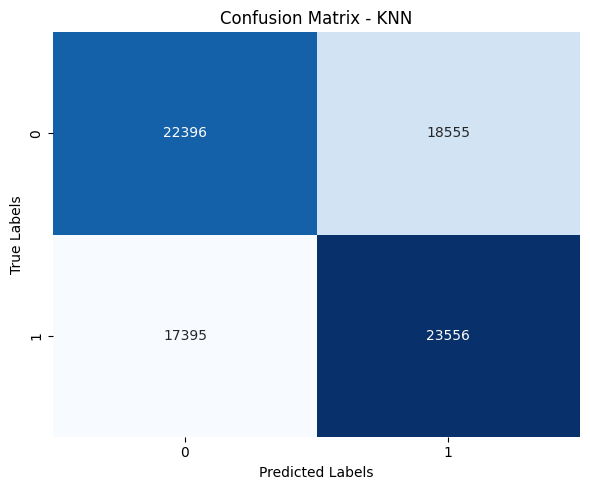

In [70]:
cm = confusion_matrix(y_test, y_pred_knn)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN')
plt.tight_layout()
plt.show()